In [ ]:
import numpy as np                #for the numerical operations
import pandas as pd               #for read file and to handle dataframes
import matplotlib.pyplot as plt   #for visuvalisation of the dataset 
import seaborn as sns             #for visuvalisation in the combination of stats method

In [ ]:
data=pd.read_csv("insala amazon.csv")

In [ ]:
data.head()

,Unnamed: 0,Customer Name,Date,Ratings,Review Title,Reviews
0,0,Unknown,11 August 2019,5.0 out of 5 stars,Dream come true product,It's a dream come true product. I bought it as...
1,1,Viraj Patel,3 January 2021,5.0 out of 5 stars,Superb OTG with Premium Quality,"Superb looks, functions really well. I am an e..."
2,2,Amazon Customer,21 July 2019,5.0 out of 5 stars,Excellent Product,Product meets our expectation. It's easy to us...
3,3,Devanu,7 February 2021,5.0 out of 5 stars,Really happy with the purchase,We were apprehensive about buying an air fryer...
4,4,Mihir Patil,20 August 2020,4.0 out of 5 stars,Good product at a great price,My friend has this Inalsa air fryer since over...


In [ ]:
data.shape

(520, 6)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Customer Name', 'Date', 'Ratings', 'Review Title',
       'Reviews'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0        int64
Customer Name    object
Date             object
Ratings          object
Review Title     object
Reviews          object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     520 non-null    int64 
 1   Customer Name  520 non-null    object
 2   Date           520 non-null    object
 3   Ratings        520 non-null    object
 4   Review Title   520 non-null    object
 5   Reviews        520 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.5+ KB


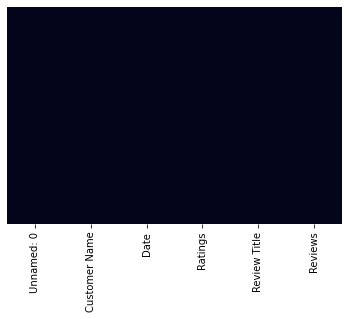

In [ ]:
sns.heatmap(data.isna(),yticklabels=False,cbar=False)

In [ ]:
data=data.drop("Unnamed: 0", axis=1)
data.head()

,Customer Name,Date,Ratings,Review Title,Reviews
0,Unknown,11 August 2019,5.0 out of 5 stars,Dream come true product,It's a dream come true product. I bought it as...
1,Viraj Patel,3 January 2021,5.0 out of 5 stars,Superb OTG with Premium Quality,"Superb looks, functions really well. I am an e..."
2,Amazon Customer,21 July 2019,5.0 out of 5 stars,Excellent Product,Product meets our expectation. It's easy to us...
3,Devanu,7 February 2021,5.0 out of 5 stars,Really happy with the purchase,We were apprehensive about buying an air fryer...
4,Mihir Patil,20 August 2020,4.0 out of 5 stars,Good product at a great price,My friend has this Inalsa air fryer since over...


In [ ]:
data.duplicated().sum() 

0

In [ ]:
data=data[["Customer Name","Reviews","Ratings"]]

In [ ]:
data.head()

,Customer Name,Reviews,Ratings
0,Unknown,It's a dream come true product. I bought it as...,5.0 out of 5 stars
1,Viraj Patel,"Superb looks, functions really well. I am an e...",5.0 out of 5 stars
2,Amazon Customer,Product meets our expectation. It's easy to us...,5.0 out of 5 stars
3,Devanu,We were apprehensive about buying an air fryer...,5.0 out of 5 stars
4,Mihir Patil,My friend has this Inalsa air fryer since over...,4.0 out of 5 stars


In [ ]:
data.Ratings=data.Ratings.map({"1.0 out of 5 stars":1,"2.0 out of 5 stars":2,"3.0 out of 5 stars":3,
                               "4.0 out of 5 stars":4,"5.0 out of 5 stars":5})

In [ ]:
data.head()

,Customer Name,Reviews,Ratings
0,Unknown,It's a dream come true product. I bought it as...,5
1,Viraj Patel,"Superb looks, functions really well. I am an e...",5
2,Amazon Customer,Product meets our expectation. It's easy to us...,5
3,Devanu,We were apprehensive about buying an air fryer...,5
4,Mihir Patil,My friend has this Inalsa air fryer since over...,4


(array([ 98.,   0.,  20.,   0.,   0.,  30.,   0., 104.,   0., 268.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

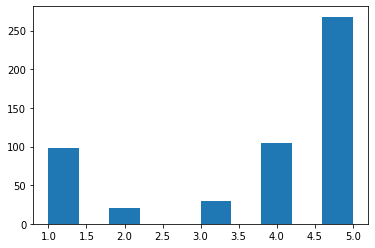

In [ ]:
plt.hist(data.Ratings)

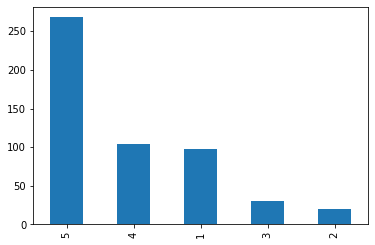

In [ ]:
data["Ratings"].value_counts().plot(kind='bar')

In [ ]:
data_pos=data[data["Ratings"].isin([4,5])]
data_neg=data[data["Ratings"].isin([1,2])]
data_net=data[data["Ratings"].isin([3])]

In [ ]:
data_fil=pd.concat([data_pos,data_neg,data_net])

In [ ]:
data_fil.head()

,Customer Name,Reviews,Ratings
0,Unknown,It's a dream come true product. I bought it as...,5
1,Viraj Patel,"Superb looks, functions really well. I am an e...",5
2,Amazon Customer,Product meets our expectation. It's easy to us...,5
3,Devanu,We were apprehensive about buying an air fryer...,5
4,Mihir Patil,My friend has this Inalsa air fryer since over...,4


In [ ]:
data_fil.tail()

,Customer Name,Reviews,Ratings
486,Sudhir Bhatia,THE PRODUCT WORKED WELL FOR ME FOR A FEW MONTH...,3
490,hemant Patil,"Working fine,",3
500,RD,The product came with an open inalsa box. No a...,3
506,Amit,Easy fr frozen foods,3
510,atul Rajpal,Good product,3


In [ ]:
data_fil.shape

(520, 3)

In [ ]:
data_fil["Sentiment"]=1
data_fil["Sentiment"][data_fil["Ratings"].isin([1,2])]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_fil.head()

,Customer Name,Reviews,Ratings,Sentiment
0,Unknown,It's a dream come true product. I bought it as...,5,1
1,Viraj Patel,"Superb looks, functions really well. I am an e...",5,1
2,Amazon Customer,Product meets our expectation. It's easy to us...,5,1
3,Devanu,We were apprehensive about buying an air fryer...,5,1
4,Mihir Patil,My friend has this Inalsa air fryer since over...,4,1


In [ ]:
data=data_fil.drop(["Ratings"],axis="columns")

In [ ]:
data.head()

,Customer Name,Reviews,Sentiment
0,Unknown,It's a dream come true product. I bought it as...,1
1,Viraj Patel,"Superb looks, functions really well. I am an e...",1
2,Amazon Customer,Product meets our expectation. It's easy to us...,1
3,Devanu,We were apprehensive about buying an air fryer...,1
4,Mihir Patil,My friend has this Inalsa air fryer since over...,1


In [ ]:
data.Sentiment.unique()

array([1, 0])

In [ ]:
#we can find the sentiment of the reviews by the another method that is using TEXTBLOB

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
x=data.iloc[:,0:2]
y=data.iloc[:,1:3]

In [ ]:
y=y.drop(["Reviews"],axis="columns")

In [ ]:
y.head()

,Sentiment
0,1
1,1
2,1
3,1
4,1


In [ ]:
x.shape

(520, 2)

In [ ]:
x.head()

,Customer Name,Reviews
0,Unknown,It's a dream come true product. I bought it as...
1,Viraj Patel,"Superb looks, functions really well. I am an e..."
2,Amazon Customer,Product meets our expectation. It's easy to us...
3,Devanu,We were apprehensive about buying an air fryer...
4,Mihir Patil,My friend has this Inalsa air fryer since over...


In [ ]:
x.reset_index(inplace=True)
y.reset_index(inplace=True)  

In [ ]:
polarity_score=[]

for i in range(0,x.shape[0]):
  score=TextBlob(x.iloc[i][2])
  score1=score.sentiment[0]
  polarity_score.append(score1)

In [ ]:
x=pd.concat([x,pd.Series(polarity_score)],axis=1)

In [ ]:
x.rename(columns={x.columns[3]:"label"},inplace=True)

In [ ]:
x.head()

,index,Customer Name,Reviews,label
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802


In [ ]:
data=pd.concat([x,y],axis="columns")

In [ ]:
data.head()

,index,Customer Name,Reviews,label,index,Sentiment
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111,0,1
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1,1
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,2,1
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619,3,1
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,4,1


In [ ]:
data=data.drop(["index"],axis=1)

In [ ]:
data.head()

,Customer Name,Reviews,label,Sentiment
0,Unknown,It's a dream come true product. I bought it as...,0.461111,1
1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1
2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,1
3,Devanu,We were apprehensive about buying an air fryer...,0.347619,1
4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,1


In [ ]:
data.tail()

,Customer Name,Reviews,label,Sentiment
515,Sudhir Bhatia,THE PRODUCT WORKED WELL FOR ME FOR A FEW MONTH...,-0.200000,1
516,hemant Patil,"Working fine,",0.416667,1
517,RD,The product came with an open inalsa box. No a...,0.000000,1
518,Amit,Easy fr frozen foods,0.433333,1
519,atul Rajpal,Good product,0.700000,1


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111,1
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,1
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619,1
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,1


In [ ]:
len(data[data.label>0])

379

In [ ]:
len(data[data.label<0])

81

In [ ]:
data.Sentiment.value_counts()

1    402
0    118
Name: Sentiment, dtype: int64

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111,1
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,1
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619,1
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,1


In [ ]:
data["Sentiment1"]=data['label'].apply(lambda k: 1 if k>=0 else 0)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111,1,1
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1,1
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,1,1
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619,1,1
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,1,1


In [ ]:
data.tail()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
515,515,Sudhir Bhatia,THE PRODUCT WORKED WELL FOR ME FOR A FEW MONTH...,-0.200000,1,0
516,516,hemant Patil,"Working fine,",0.416667,1,1
517,517,RD,The product came with an open inalsa box. No a...,0.000000,1,1
518,518,Amit,Easy fr frozen foods,0.433333,1,1
519,519,atul Rajpal,Good product,0.700000,1,1


In [ ]:
data.Sentiment.value_counts()

1    402
0    118
Name: Sentiment, dtype: int64

In [ ]:
data.Sentiment1.value_counts()

1    439
0     81
Name: Sentiment1, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(data.Sentiment,data.Sentiment1)

In [ ]:
cm

array([[ 64,  54],
       [ 17, 385]])

In [ ]:
data1=data[data["Sentiment"]!=data["Sentiment1"]]

In [ ]:
data1

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
56,56,Neha,Make men in house cook. Teach them . One two t...,-0.175000,1,0
86,86,Maharshi,Tried with various frozen food items and works...,-0.083333,1,0
110,110,Amazon Customer,I used this one for making french fries.it cam...,-0.083333,1,0
224,224,Amazon Customer,The product is good...i can make crispy n juic...,-0.600000,1,0
238,238,Anil Rashima,Heating takes little long,-0.118750,1,0
...,...,...,...,...,...,...
502,502,Pandey ji,The product is too small is the big piece of p...,-0.125000,1,0
505,505,Shakila,Its good....but u don't have full chicken gril...,-0.125000,1,0
508,508,Shefali Chopra,Price is less but features r also less.Kindly...,-0.145833,1,0
513,513,Rajesh jain,I'm sorry not refund inlasa oven,-0.500000,1,0


In [ ]:
print("Wrongly classified are:",len(data1))

Wrongly classified are: 71


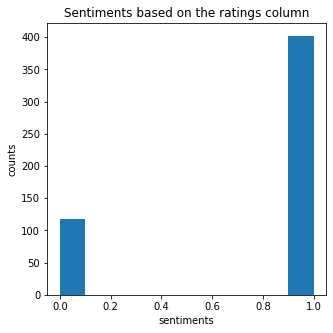

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

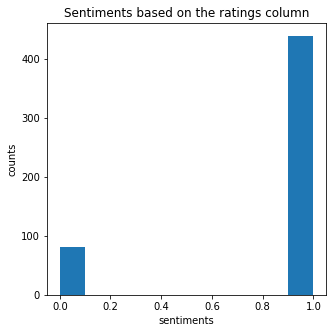

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(data.Sentiment1)
plt.xlabel("sentiments")
plt.ylabel("counts")
plt.title("Sentiments based on the ratings column")
plt.show()

In [ ]:
#to find out the wrongly classified 

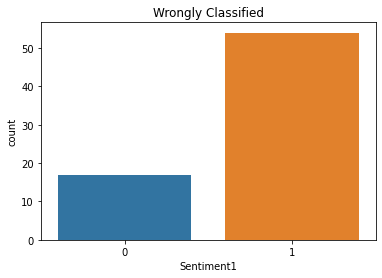

In [ ]:
sns.countplot(data=data1, x= 'Sentiment1')
plt.title("Wrongly Classified");

In [ ]:
#building the wordcloud for the positive,negative and neutral

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111,1,1
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1,1
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,1,1
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619,1,1
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,1,1


In [ ]:
#word cloud on the reviews columns in the dataset

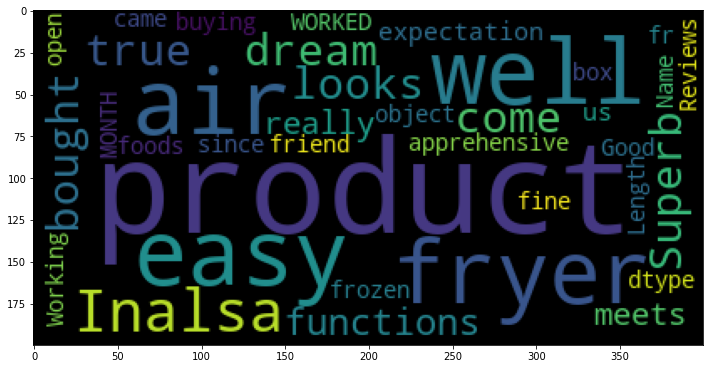

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words("english")).generate(str(data.Reviews))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
data_pos=data[data.Sentiment==1]
data_pos.shape

(402, 6)

In [ ]:
data_neg=data[data.Sentiment==0]
data_neg.shape

(118, 6)

In [ ]:
#wordcloud on the postive reviews in the dataset

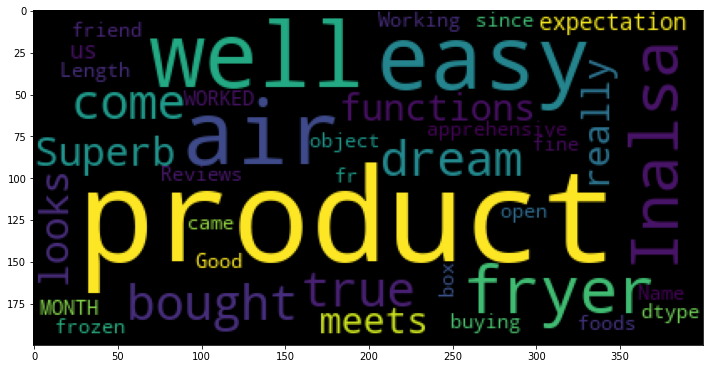

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_pos["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
#wordcloud on the neutral reviews in the dataset

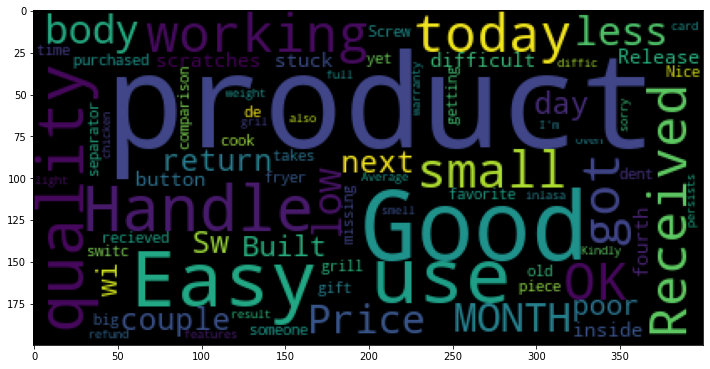

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_net["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
#wordcloud on the negative reviews in the dataset

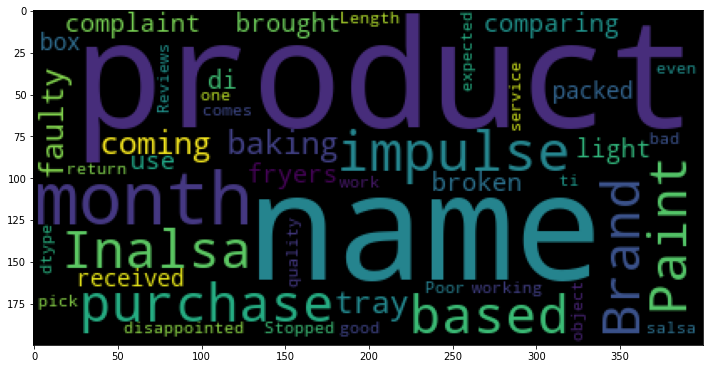

In [ ]:
cloud=WordCloud(max_words=75,stopwords=stopwords.words('english')).generate(str(data_neg["Reviews"]))
plt.figure(figsize=(12,12))
plt.imshow(cloud)

In [ ]:
data.head()

,index,Customer Name,Reviews,label,Sentiment,Sentiment1
0,0,Unknown,It's a dream come true product. I bought it as...,0.461111,1,1
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",0.312500,1,1
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,0.716667,1,1
3,3,Devanu,We were apprehensive about buying an air fryer...,0.347619,1,1
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,0.131802,1,1


In [ ]:
#seperate the depended and independed variable
remove=["label","Sentiment","Sentiment1"]
x=data.drop(labels=remove,axis=1)

In [ ]:
remove=["Reviews","label","Sentiment1"]
y=data.drop(labels=remove,axis=1)

In [ ]:
y

,index,Customer Name,Sentiment
0,0,Unknown,1
1,1,Viraj Patel,1
2,2,Amazon Customer,1
3,3,Devanu,1
4,4,Mihir Patil,1
...,...,...,...
515,515,Sudhir Bhatia,1
516,516,hemant Patil,1
517,517,RD,1
518,518,Amit,1


In [ ]:
import re                               #regular expression
import nltk                              #Natural Language Toolkit 
from nltk.corpus import stopwords         #the common words in the language
from nltk.stem import WordNetLemmatizer    #converts the similar words into the single word with sence

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lem=WordNetLemmatizer()

In [ ]:
corpus=[]

In [ ]:
#clean data in this
    #we remove stopwords
    #we convert all into lower case
    #we split the sentences into words 
    #by using words it lematise the words
    #after we combine into sentence
    #finally we should append it to corpus

In [ ]:
for i in range(0,len(x)):
  review=re.sub('[^a-zA-Z0-9]',' ',x.Reviews[i])
  review=review.lower()
  review=review.split()
  review=[lem.lemmatize(word)for word in review if word not in set (stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
x.Reviews[1]

"Superb looks, functions really well. I am an experienced baker, I tend to use my OTGs heavily, almost daily! This one is performing as expected. Little bit pricy but worth it, Gives posh look in your kitchen.Widebody, let's me cook delicious Cast iron pizzas in it. I can bake a lot of stuff at a time. Must buy!"

In [ ]:
corpus[1]

'superb look function really well experienced baker tend use otgs heavily almost daily one performing expected little bit pricy worth give posh look kitchen widebody let cook delicious cast iron pizza bake lot stuff time must buy'

In [ ]:
df=pd.DataFrame(corpus)

In [ ]:
data=pd.concat([x,df],axis=1)

In [ ]:
data.head()

,index,Customer Name,Reviews,0
0,0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...
3,3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...


In [ ]:
data.rename(columns={0:"cleaned Reviews"},inplace=True)

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews
0,0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...
3,3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...


In [ ]:
!pip install texthero

In [ ]:
import texthero as hero

In [ ]:
data['tfidf']=(
    data['cleaned Reviews']
    .pipe(hero.clean)
    .pipe(hero.tfidf)        #->remove 'do_'
)

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf
0,0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
#appling the clustering to the tfidf

In [ ]:
data['kmeans']=(
    data['tfidf']
    .pipe(hero.kmeans,n_clusters=2)      #->remove 'do_'
    .astype(str)
)

In [ ]:
data.kmeans.unique()

array(['0', '1'], dtype=object)

In [ ]:
#we have to reduce the feature by applying PCA on tfidf feature

In [ ]:
data['pca']=data['tfidf'].pipe(hero.pca)      #->remove 'do_'

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca
0,0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0986254399169307, 0.02073943862661627]"
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12328739998809421, -0.07745802465958392]"
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0652028246163169, 0.20272412653188168]"
3,3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12652646310536145, -0.035567785202219544]"
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.03744447761121286, -0.15981580946205964]"


In [ ]:
hero.scatterplot(data,'pca',color='kmeans',title="reviews grouping")
plt.figure(figsize=(12,12))
plt.show()

<Figure size 864x864 with 0 Axes>

In [ ]:
#Plot of most used words
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(data['cleaned Reviews'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_

In [ ]:
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_ngram

,frequency,bigram
0,111,easy use
1,47,good product
2,44,air fryer
3,32,nice product
4,30,value money
...,...,...
4266,1,10 sbi
4267,1,10 ltr
4268,1,10 heat
4269,1,10 15


In [ ]:
df_plot=df_ngram.head(10)
df_plot

,frequency,bigram
0,111,easy use
1,47,good product
2,44,air fryer
3,32,nice product
4,30,value money
5,27,product easy
6,16,french fry
7,11,use clean
8,11,stopped working
9,11,must buy


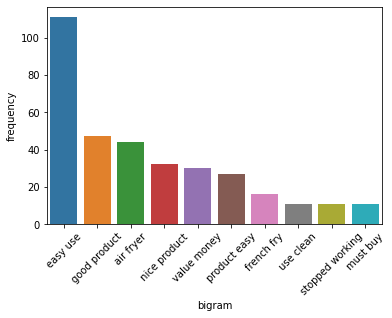

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="bigram", y="frequency", data=df_plot)
plt.xticks(rotation=45)
plt.show()

# Emotion Mining

In [ ]:
import text2emotion as te

In [ ]:
!pip install text2emotion

In [ ]:
data["Emotion"]=data["cleaned Reviews"].apply(lambda text: te.get_emotion(text))
data["Emotion"]

0      {'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...
1      {'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...
2      {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...
3      {'Happy': 0.1, 'Angry': 0.0, 'Surprise': 0.6, ...
4      {'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.21...
                             ...                        
515    {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...
516    {'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...
517    {'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.17...
518    {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...
519    {'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, ...
Name: Emotion, Length: 520, dtype: object

In [ ]:
data['Happy']  = data["Emotion"].apply(lambda score_dict: score_dict['Happy'])
data["Happy"]

0      0.25
1      0.22
2      0.50
3      0.10
4      0.29
       ... 
515    0.00
516    0.50
517    0.17
518    0.00
519    1.00
Name: Happy, Length: 520, dtype: float64

In [ ]:
data['Angry']  = data["Emotion"].apply(lambda score_dict: score_dict['Angry'])
data["Angry"]

0      0.00
1      0.11
2      0.00
3      0.00
4      0.00
       ... 
515    0.00
516    0.00
517    0.00
518    0.00
519    0.00
Name: Angry, Length: 520, dtype: float64

In [ ]:
data['Surprise']  = data["Emotion"].apply(lambda score_dict: score_dict['Surprise'])
data["Surprise"]

0      0.25
1      0.11
2      0.00
3      0.60
4      0.21
       ... 
515    0.00
516    0.00
517    0.17
518    0.00
519    0.00
Name: Surprise, Length: 520, dtype: float64

In [ ]:
data['Sad']  = data["Emotion"].apply(lambda score_dict: score_dict['Sad'])
data["Sad"]

0      0.00
1      0.33
2      0.00
3      0.00
4      0.17
       ... 
515    0.25
516    0.00
517    0.33
518    0.00
519    0.00
Name: Sad, Length: 520, dtype: float64

In [ ]:
data['Fear']  = data["Emotion"].apply(lambda score_dict: score_dict['Fear'])
data["Fear"]

0      0.50
1      0.22
2      0.50
3      0.30
4      0.33
       ... 
515    0.75
516    0.50
517    0.33
518    0.00
519    0.00
Name: Fear, Length: 520, dtype: float64

In [ ]:
data.head()

,index,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0986254399169307, 0.02073943862661627]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",0.25,0.00,0.25,0.00,0.50
1,1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12328739998809421, -0.07745802465958392]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.33,0.22
2,2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0652028246163169, 0.20272412653188168]","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...",0.50,0.00,0.00,0.00,0.50
3,3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12652646310536145, -0.035567785202219544]","{'Happy': 0.1, 'Angry': 0.0, 'Surprise': 0.6, ...",0.10,0.00,0.60,0.00,0.30
4,4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.03744447761121286, -0.15981580946205964]","{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.21...",0.29,0.00,0.21,0.17,0.33


In [ ]:
data=data.drop("index",axis=1)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear
0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0986254399169307, 0.02073943862661627]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",0.25,0.00,0.25,0.00,0.50
1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12328739998809421, -0.07745802465958392]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.33,0.22
2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0652028246163169, 0.20272412653188168]","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...",0.50,0.00,0.00,0.00,0.50
3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12652646310536145, -0.035567785202219544]","{'Happy': 0.1, 'Angry': 0.0, 'Surprise': 0.6, ...",0.10,0.00,0.60,0.00,0.30
4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.03744447761121286, -0.15981580946205964]","{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.21...",0.29,0.00,0.21,0.17,0.33


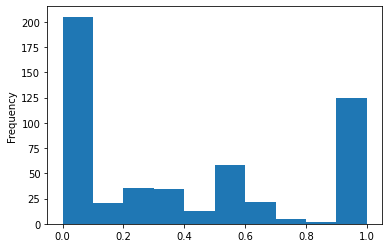

In [ ]:
#Histogram of Happy emotion from the reviews
data["Happy"].plot(kind="hist")

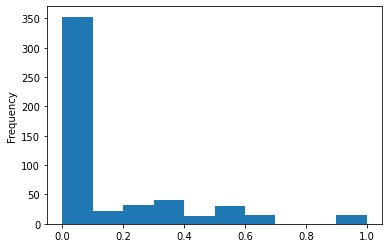

In [ ]:
#Histogram of Sad emotion from the reviews
data["Sad"].plot(kind="hist")

Happy  Angry  Surprise  Sad  Fear
0.25   0.0    0.25      0.0  0.5     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

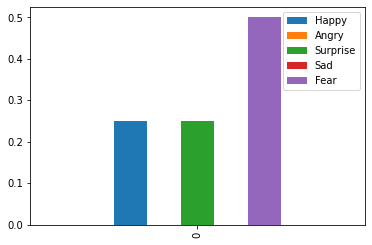

In [ ]:
#Histogram of the first review
data.head(1).groupby(["Happy","Angry","Surprise","Sad","Fear"]).plot(kind="bar")

# Parts Of Speech Tagging

In [ ]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
# creating the nlp obejct
nlp = spacy.load("en_core_web_sm")

# defining the stop_words and punctuations we want to remove
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
# Loop to get just the adjectives from each review
words_adj = []
for line in data['Reviews']:  
    doc= nlp(line) 
    tokens = [tok.lemma_.lower().strip() for tok in doc if tok.pos_ == 'ADJ'] 
    words_adj.append(tokens)

In [ ]:
# create a new column with the adjectives
data['words_adj'] = pd.Series(words_adj)
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0986254399169307, 0.02073943862661627]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",0.25,0.00,0.25,0.00,0.50,"[true, amazing, easy, semi]"
1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12328739998809421, -0.07745802465958392]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.33,0.22,"[experienced, little, worth, posh, delicious]"
2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0652028246163169, 0.20272412653188168]","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...",0.50,0.00,0.00,0.00,0.50,"[easy, excellent]"
3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12652646310536145, -0.035567785202219544]","{'Happy': 0.1, 'Angry': 0.0, 'Surprise': 0.6, ...",0.10,0.00,0.60,0.00,0.30,"[apprehensive, last, abundant, easy, fried, fl..."
4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.03744447761121286, -0.15981580946205964]","{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.21...",0.29,0.00,0.21,0.17,0.33,"[happy, additional, utter, first, dead, scepti..."


In [ ]:
#MOST COMMON POSITIVE ADJECTIVES
from collections import Counter
positive_adj= data[data['kmeans']=='0']['words_adj']
pos_words= [line for line in positive_adj for line in set(line)]
pos_adj_count= Counter(pos_words).most_common(10)
pos_adj_count

[('easy', 123),
 ('good', 96),
 ('nice', 49),
 ('great', 29),
 ('happy', 26),
 ('small', 25),
 ('excellent', 22),
 ('perfect', 17),
 ('awesome', 17),
 ('bad', 17)]

In [ ]:
dfp=pd.DataFrame(pos_adj_count)
dfp

,0,1
0,easy,123
1,good,96
2,nice,49
3,great,29
4,happy,26
5,small,25
6,excellent,22
7,perfect,17
8,awesome,17
9,bad,17


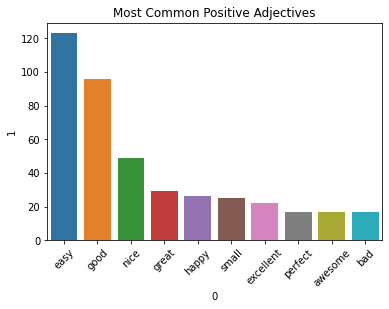

In [ ]:
#Plot to show the positive adjectives
sns.barplot(x=0, y=1, data=dfp)
plt.xticks(rotation=45)
plt.title("Most Common Positive Adjectives");
plt.show()

In [ ]:
#MOST COMMON NEGATIVE ADJECTIVES
import collections
negative_adj= data[data['kmeans']=='1']['words_adj']
neg_words= [line for line in negative_adj for line in set(line)]
neg_adj_count= collections.Counter(neg_words).most_common(10)
neg_adj_count


[('good', 53),
 ('easy', 9),
 ('nice', 3),
 ('low', 2),
 ('useful', 1),
 ('quick', 1),
 ('usefull', 1),
 ('spacious', 1),
 ('reasonable', 1)]

In [ ]:
dfn=pd.DataFrame(neg_adj_count)
dfn

,0,1
0,good,53
1,easy,9
2,nice,3
3,low,2
4,useful,1
5,quick,1
6,usefull,1
7,spacious,1
8,reasonable,1


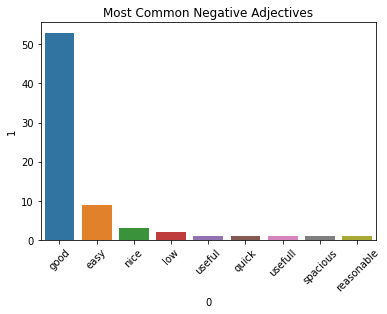

In [ ]:
#Plot to show negative adjectives
sns.barplot(x=0, y=1, data=dfn)
plt.xticks(rotation=45)
plt.title("Most Common Negative Adjectives");
plt.show()

# Named Entity Recognition

In [ ]:
rev=data['Reviews']
rev[0]

"It's a dream come true product. I bought it as deal of the day and functions are amazing. Easy to use. I have even used their semi auto washing machine. Thanx amazon for selling it"

In [ ]:
import spacy
from spacy import displacy


nlp = spacy.load("en_core_web_sm")
doc = nlp(rev[0])
displacy.render(doc, style="dep")

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="9b6e8636f158412b82f6b61aff718bf9-0" class="displacy" width="6350" height="662.0" direction="ltr" style="max-width: none; height: 662.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="572.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">It</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PRON</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="572.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">\'s</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">AUX</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="572.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">a</tspan>\n    <tspan class="displacy-tag" dy=

In [ ]:
displacy.render(doc, style="ent")

'<div class="entities" style="line-height: 2.5; direction: ltr">It\'s a dream come true product. I bought it as deal of \n<mark class="entity" style="background: #bfe1d9; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    the day\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">DATE</span>\n</mark>\n and functions are amazing. Easy to use. I have even used their semi auto washing machine. Thanx amazon for selling it</div>'

#LDA-Latent Drichilet Allocation

In [ ]:
!pip install gensim

In [ ]:
!pip install pyldavis

     |████████████████████████████████| 1.7MB 7.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 25.4MB/s 
     |████████████████████████████████| 15.3MB 177kB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=60217739153907678d402d5ddff35851af86bcc22458ccc262cc3200bf7ac51c
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyldavis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
import gensim
from gensim import corpora,models
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
data.head()

,Customer Name,Reviews,cleaned Reviews,tfidf,kmeans,pca,Emotion,Happy,Angry,Surprise,Sad,Fear,words_adj
0,Unknown,It's a dream come true product. I bought it as...,dream come true product bought deal day functi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0986254399169307, 0.02073943862661627]","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.25...",0.25,0.00,0.25,0.00,0.50,"[true, amazing, easy, semi]"
1,Viraj Patel,"Superb looks, functions really well. I am an e...",superb look function really well experienced b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12328739998809421, -0.07745802465958392]","{'Happy': 0.22, 'Angry': 0.11, 'Surprise': 0.1...",0.22,0.11,0.11,0.33,0.22,"[experienced, little, worth, posh, delicious]"
2,Amazon Customer,Product meets our expectation. It's easy to us...,product meet expectation easy use performance ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.0652028246163169, 0.20272412653188168]","{'Happy': 0.5, 'Angry': 0.0, 'Surprise': 0.0, ...",0.50,0.00,0.00,0.00,0.50,"[easy, excellent]"
3,Devanu,We were apprehensive about buying an air fryer...,apprehensive buying air fryer spent last three...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.12652646310536145, -0.035567785202219544]","{'Happy': 0.1, 'Angry': 0.0, 'Surprise': 0.6, ...",0.10,0.00,0.60,0.00,0.30,"[apprehensive, last, abundant, easy, fried, fl..."
4,Mihir Patil,My friend has this Inalsa air fryer since over...,friend inalsa air fryer since year considering...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[-0.03744447761121286, -0.15981580946205964]","{'Happy': 0.29, 'Angry': 0.0, 'Surprise': 0.21...",0.29,0.00,0.21,0.17,0.33,"[happy, additional, utter, first, dead, scepti..."


In [ ]:
data.columns

Index(['Customer Name', 'Reviews', 'cleaned Reviews', 'tfidf', 'kmeans', 'pca',
       'Emotion', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear', 'words_adj'],
      dtype='object')

In [ ]:
#from the above we need only Reviews column to find the topics of the in the each review column

In [ ]:
remove=["Customer Name","cleaned Reviews","tfidf","kmeans","pca","Emotion","Happy","Angry","Surprise","Sad","Fear","words_adj"]
data1=data.drop(labels=remove,axis="columns")

In [ ]:
data1.head()

,Reviews
0,It's a dream come true product. I bought it as...
1,"Superb looks, functions really well. I am an e..."
2,Product meets our expectation. It's easy to us...
3,We were apprehensive about buying an air fryer...
4,My friend has this Inalsa air fryer since over...


In [ ]:
#this is the raw data we have to clean the data
#to find the topics in the each topic modelling in reviews 

In [ ]:
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [ ]:
data1["review_clean"]=data1["Reviews"].apply(clean)

In [ ]:
data1.head()

,Reviews,review_clean
0,It's a dream come true product. I bought it as...,"[dream, come, true, product, bought, deal, day..."
1,"Superb looks, functions really well. I am an e...","[superb, look, function, really, well, experie..."
2,Product meets our expectation. It's easy to us...,"[product, meet, expectation, easy, use, perfor..."
3,We were apprehensive about buying an air fryer...,"[apprehensive, buying, air, fryer, spent, last..."
4,My friend has this Inalsa air fryer since over...,"[friend, inalsa, air, fryer, since, year, cons..."


In [ ]:
data1["review_clean"][3]

['apprehensive',
 'buying',
 'air',
 'fryer',
 'spent',
 'last',
 'three',
 'decade',
 'frying',
 'fish',
 'kadhai',
 'abundant',
 'cooking',
 'oil',
 'however',
 'purchasing',
 'air',
 'fryer',
 'quite',
 'epiphany',
 'really',
 'easy',
 'use',
 'fried',
 'fish',
 'came',
 'really',
 'well',
 'flavorful',
 'end',
 'product',
 'way',
 'even',
 'better',
 'output',
 'cooking',
 'gas',
 'really',
 'happy',
 'purchase']

In [ ]:
#create dictionary
dictionary=corpora.Dictionary(data1["review_clean"])

In [ ]:
dictionary[1699]

'fineseller'

In [ ]:
len(dictionary)

1701

In [ ]:
#total no of non-zeros in the dictionary

In [ ]:
print(dictionary.num_nnz)

5416


In [ ]:
#create term document matrix

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data1['review_clean'] ]
print(len(doc_term_matrix))

520


In [ ]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(10, 1),
  (17, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 2),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(8, 1), (12, 1), (17, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(8, 1),
  (9, 1),
  (12, 1),
  (17, 1),
  (47, 3),
  (52, 1),
  (58, 1),
  (59, 2),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 2),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),

In [ ]:
#instantiate LDA model 

In [ ]:
lda=gensim.models.ldamodel.LdaModel

In [ ]:
#fit LDA model on dataset

In [ ]:
num_topics=5
ldamodel=lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

In [ ]:
#print the topics identified by LDA model

In [ ]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.021*"product" + 0.010*"best" + 0.009*"amazon" + 0.009*"used" + 0.008*"work" + 0.007*"service" + 0.007*"small" + 0.006*"made" + 0.006*"customer" + 0.006*"even"'),
 (1,
  '0.052*"product" + 0.029*"money" + 0.024*"value" + 0.022*"nice" + 0.009*"use" + 0.009*"it" + 0.009*"awesome" + 0.008*"easy" + 0.007*"fryer" + 0.007*"air"'),
 (2,
  '0.026*"product" + 0.014*"working" + 0.014*"one" + 0.009*"brand" + 0.008*"time" + 0.007*"good" + 0.006*"return" + 0.006*"month" + 0.006*"like" + 0.006*"item"'),
 (3,
  '0.067*"good" + 0.059*"product" + 0.018*"use" + 0.014*"easy" + 0.011*"also" + 0.011*"price" + 0.010*"food" + 0.010*"got" + 0.009*"well" + 0.008*"quality"'),
 (4,
  '0.044*"use" + 0.041*"easy" + 0.031*"product" + 0.018*"air" + 0.017*"fryer" + 0.014*"good" + 0.010*"oil" + 0.010*"fry" + 0.010*"cooking" + 0.010*"happy"')]

In [ ]:
lda_corpus = ldamodel[doc_term_matrix]

In [ ]:
[doc for doc in lda_corpus]

[[(0, 0.74961424),
  (1, 0.009635654),
  (2, 0.009609135),
  (3, 0.009673141),
  (4, 0.22146784)],
 [(0, 0.005161029),
  (1, 0.5914863),
  (2, 0.0052153314),
  (3, 0.005222092),
  (4, 0.3929153)],
 [(0, 0.0250741),
  (1, 0.025224064),
  (2, 0.025528524),
  (3, 0.025674505),
  (4, 0.89849883)],
 [(0, 0.40949687),
  (1, 0.0049234834),
  (2, 0.004923342),
  (3, 0.004939383),
  (4, 0.575717)],
 [(0, 0.0020935207),
  (1, 0.0020854075),
  (2, 0.002132393),
  (3, 0.002108207),
  (4, 0.9915804)],
 [(0, 0.094825074),
  (1, 0.0029832693),
  (2, 0.0029592605),
  (3, 0.5700526),
  (4, 0.32917985)],
 [(0, 0.008729724),
  (1, 0.0088975355),
  (2, 0.008763159),
  (3, 0.96451795),
  (4, 0.009091629)],
 [(0, 0.0061537307),
  (1, 0.0061413026),
  (2, 0.0061787097),
  (3, 0.9753641),
  (4, 0.0061621335)],
 [(0, 0.0057805823),
  (1, 0.005819473),
  (2, 0.005857845),
  (3, 0.00584353),
  (4, 0.9766985)],
 [(0, 0.004714639),
  (1, 0.0047221696),
  (2, 0.004750486),
  (3, 0.9810884),
  (4, 0.004724298)],
 [(